# The Logistic Regression Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/4_Logistic_Regression/logistic_regression.ipynb)

Task: Use single neuron logistic regression model to perform binary classification on the breast cancer dataset from the `sklearn.datasets` module. We will build the logistic regression model from scratch.

This is a binary classification problem to predict whether a given tumor is benign or malignant based on its characteristics (represented by the various features in the dataset). 
The labels 0 and 1 represent the two classes into which the tumors have been classified. Specifically:
- Maligent = 0 - tumors that are problematic.
- Benign = 1 - tumors that are not usually problematic.

In [24]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Dataset
First, load the breast cancer dataset using the `load_breast_cancer` function from `sklearn.datasets`. This dataset consists of 569 samples, each with 30 features, and a binary target variable indicating whether the sample is benign or malignant.

#### Data Exploration/Visualization 
A detailed description and visualization of the cancer dataset is provided in the [Perceptron Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/1_Perceptron/Perceptron.ipynb).

In [25]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()

#### Data Preprocessing
- Split data into Features (X) and lables (y)
- Normalize the data
- Split data into test and train sets

In [26]:
#split target and features
X = data.data
y = data.target
# normalize data
X = (X - X.mean(axis=0)) / X.std(axis=0)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model
Next: build logistic regression model from scratch. Logistic regression is a binary classification algorithm that uses a sigmoid function to map the input features to a probability of the positive class.

The equation for logistic regression can be written as:

$y = \sigma(w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n)$

where $y$ is the predicted class probability, $\sigma$ is the sigmoid function, $w_0$ is the bias term, $w_1$ to $w_n$ are the weights for the features $x_1$ to $x_n$. The sigmoid function is defined as:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

where $z$ is the linear combination of the weights and features:

$z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

The following code provides visualization of Sigmoid function with random inputs.

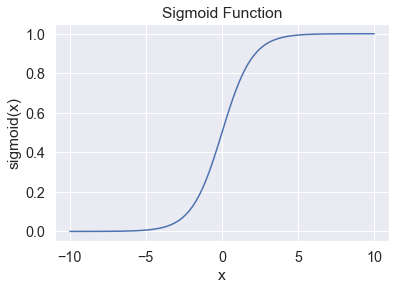

In [27]:
def sigmoid(x):
    """
    Compute sigmoid of input array.

    Parameters:
    -----------
    z : array-like, shape (n_samples,)
        Input array.

    Returns:
    --------
    sigmoid : array-like, shape (n_samples,)
        Sigmoid of input array.

    """
    return 1 / (1 + np.exp(-x))

#Visualize the sigmoid function 
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

#### Loss and Gradient Descent
Train the logistic regression model using gradient descent to minimize the loss function.

The cost function (cross-entropy loss function) for logistic regression can be written as:

$J(w) = -\frac{1}{m} \sum_{i=1}^m [y_i\log(y_{pred_i}) + (1-y_i)\log(1-y_{pred_i})]$

where $m$ is the number of samples, $y_i$ is the true label for sample $i$, $y_{pred_i}$ is the predicted label for sample $i$, and $w$ is the vector of weights. The cost function measures the error between the true labels and the predicted labels, penalizing the model heavily for high-confidence incorrect predictions. The goal of training the logistic regression model is to find the values of the weights that minimize this cost function.

#### Model Implementation

In [28]:
class LogisticRegression:
    """
    Logistic regression implementation using gradient descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The learning rate used to update weights and bias during optimization.

    num_iterations : int, default=1000
        The number of iterations for optimization.

    Attributes:
    -----------
    weights : array-like, shape (n_features,)
        The learned weights of the logistic regression model.

    bias : float
        The learned bias term of the logistic regression model.

    losses : list
        The training loss for each iteration during optimization.

    Methods:
    --------
    sigmoid(self, z):
        Compute sigmoid of input array.

    fit(self, X, y):
        Fit logistic regression model on training data.

    predict(self, X):
        Predict the class labels for the input data.
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initialize logistic regression model.

        Parameters:
        -----------
        learning_rate : float, default=0.01
            The learning rate used to update weights and bias during optimization.

        num_iterations : int, default=1000
            The number of iterations for optimization.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        """
        Compute sigmoid of input array.

        Parameters:
        -----------
        z : array-like, shape (n_samples,)
            Input array.

        Returns:
        --------
        sigmoid : array-like, shape (n_samples,)
            Sigmoid of input array.
        """
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Fit logistic regression model on training data.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        y : array-like, shape (n_samples,)
            The target values.
        """

        num_samples, num_features = X.shape
        
        # initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # keep track of loss for each iteration
        self.losses = []
        
        for i in range(self.num_iterations):
            # forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # compute cost
            cost = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            self.losses.append(cost)

            # backward pass
            dz = y_pred - y
            dw = np.dot(X.T, dz) / num_samples
            db = np.mean(dz)

            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        Returns:
        --------
        y_pred : array-like, shape (n_samples,)
            The predicted class labels.
        """
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred > 0.5).astype(int)

#### Model Training

In [29]:
# train model
model = LogisticRegression()
model.fit(X_train, y_train)

#### Performance Evaluation

In [30]:
from sklearn.metrics import accuracy_score
# make predictions using testing data
y_pred = model.predict(X_test)
# calculate accuracy and confusion matrix on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.99


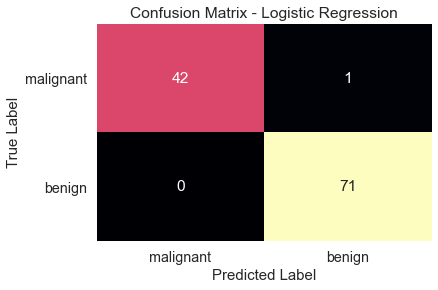

In [31]:
# Import metrics from sklearn 
from sklearn import metrics
# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - Logistic Regression")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()

- The confusion matrix shows there's only one false prediction. Which justifies the 99% accuracy.

In [32]:
from sklearn.metrics import classification_report
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#### ROC Curve
A ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds. The area under the ROC curve (AUC) is a measure of the overall performance of a binary classifier. 

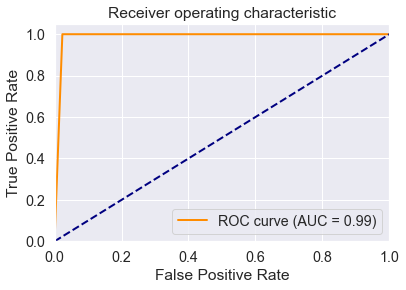

In [33]:
# calculate ROC curve and AUC on test set
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- The high AUC of 0.99 indicates that the classifier has a very high true positive rate and a very low false positive rate. This means that the classifier is able to correctly identify most of the positive cases while keeping the number of false positives very low. Such a classifier would be very useful in applications where the cost of false positives is high, such as medical diagnosis.

### Conclusion
- The logistic regression is found to be very accurate in classifying whether the sample is benign or malignant.
- The model's testing accuracy is found to be 99%. 
- The precision of the gradient descent is 100% and 99% respectively for malignant and benign tumors.